# MUSHROOM-EDIBILITY

**EXPLORATORY DATA ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox,zscore

In [2]:
ms=pd.read_csv('mushroom.csv',names=('status','cap_shape','cap_surface','cap_clr','bruises','odor','gill-attachment',
                                     'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
                                     'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
                                     'stalk-color-below-ring','veil-type','veil-color','ring-no','ring-type',
                                     'spore-color','popul','habitat'),na_values='?')
print(ms.head(4))

  status cap_shape cap_surface cap_clr bruises odor gill-attachment  \
0      p         x           s       n       t    p               f   
1      e         x           s       y       t    a               f   
2      e         b           s       w       t    l               f   
3      p         x           y       w       t    p               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-no  \
0                      w                      w         p          w       o   
1                      w                      w         p          w       o   
2                      w                      w         p 

In [3]:
ms.shape

(8124, 23)

In [4]:
ms.columns

Index(['status', 'cap_shape', 'cap_surface', 'cap_clr', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-no',
       'ring-type', 'spore-color', 'popul', 'habitat'],
      dtype='object')

In [5]:
ms.isnull().sum()

status                         0
cap_shape                      0
cap_surface                    0
cap_clr                        0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-no                        0
ring-type                      0
spore-color                    0
popul                          0
habitat                        0
dtype: int64

In [6]:
ms['stalk-root'].fillna(ms['stalk-root'].mode().loc[0],inplace=True)

In [7]:
ms.isnull().sum()

status                      0
cap_shape                   0
cap_surface                 0
cap_clr                     0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-no                     0
ring-type                   0
spore-color                 0
popul                       0
habitat                     0
dtype: int64

In [8]:
dups=ms.duplicated(keep='first').sum()
if dups>0:
    print('There are duplicated values in this dataset and removing it...')
    mush=ms.drop_duplicates(keep='first')
    print('Earlier with duplicated values the shape was',ms.shape,'\nAfter removing duplocates shape become',mush.shape,
          '\nTotal of',dups,'duplicated values were dropped.')
else:
    print('There is no DUPLICATED VALUES to drop')

There is no DUPLICATED VALUES to drop


In [9]:
ms.dtypes

status                      object
cap_shape                   object
cap_surface                 object
cap_clr                     object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-no                     object
ring-type                   object
spore-color                 object
popul                       object
habitat                     object
dtype: object

In [10]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   status                    8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_clr                   8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
ms.columns

Index(['status', 'cap_shape', 'cap_surface', 'cap_clr', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-no',
       'ring-type', 'spore-color', 'popul', 'habitat'],
      dtype='object')

In [12]:
for i in ms.columns:
    uniq=ms[i].nunique()
    dt=ms[i].dtypes
    print('Numbers of UNIQUE VALUE in :-',i.upper(),'=',uniq,'& data_type=',dt,'\n','______'*12,'\n')

Numbers of UNIQUE VALUE in :- STATUS = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- CAP_SHAPE = 6 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- CAP_SURFACE = 4 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- CAP_CLR = 10 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- BRUISES = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- ODOR = 9 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- GILL-ATTACHMENT = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQU

In [13]:
for i in ms.columns:
    x=ms[i].value_counts()
    print('the unique value counts of column ',i ,'is\n', x )
    print('_________________________________________________')

the unique value counts of column  status is
 e    4208
p    3916
Name: status, dtype: int64
_________________________________________________
the unique value counts of column  cap_shape is
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64
_________________________________________________
the unique value counts of column  cap_surface is
 y    3244
s    2556
f    2320
g       4
Name: cap_surface, dtype: int64
_________________________________________________
the unique value counts of column  cap_clr is
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap_clr, dtype: int64
_________________________________________________
the unique value counts of column  bruises is
 f    4748
t    3376
Name: bruises, dtype: int64
_________________________________________________
the unique value counts of column  odor is
 n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m

In [14]:
o=['object']
ms.describe(include=o)

,status,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


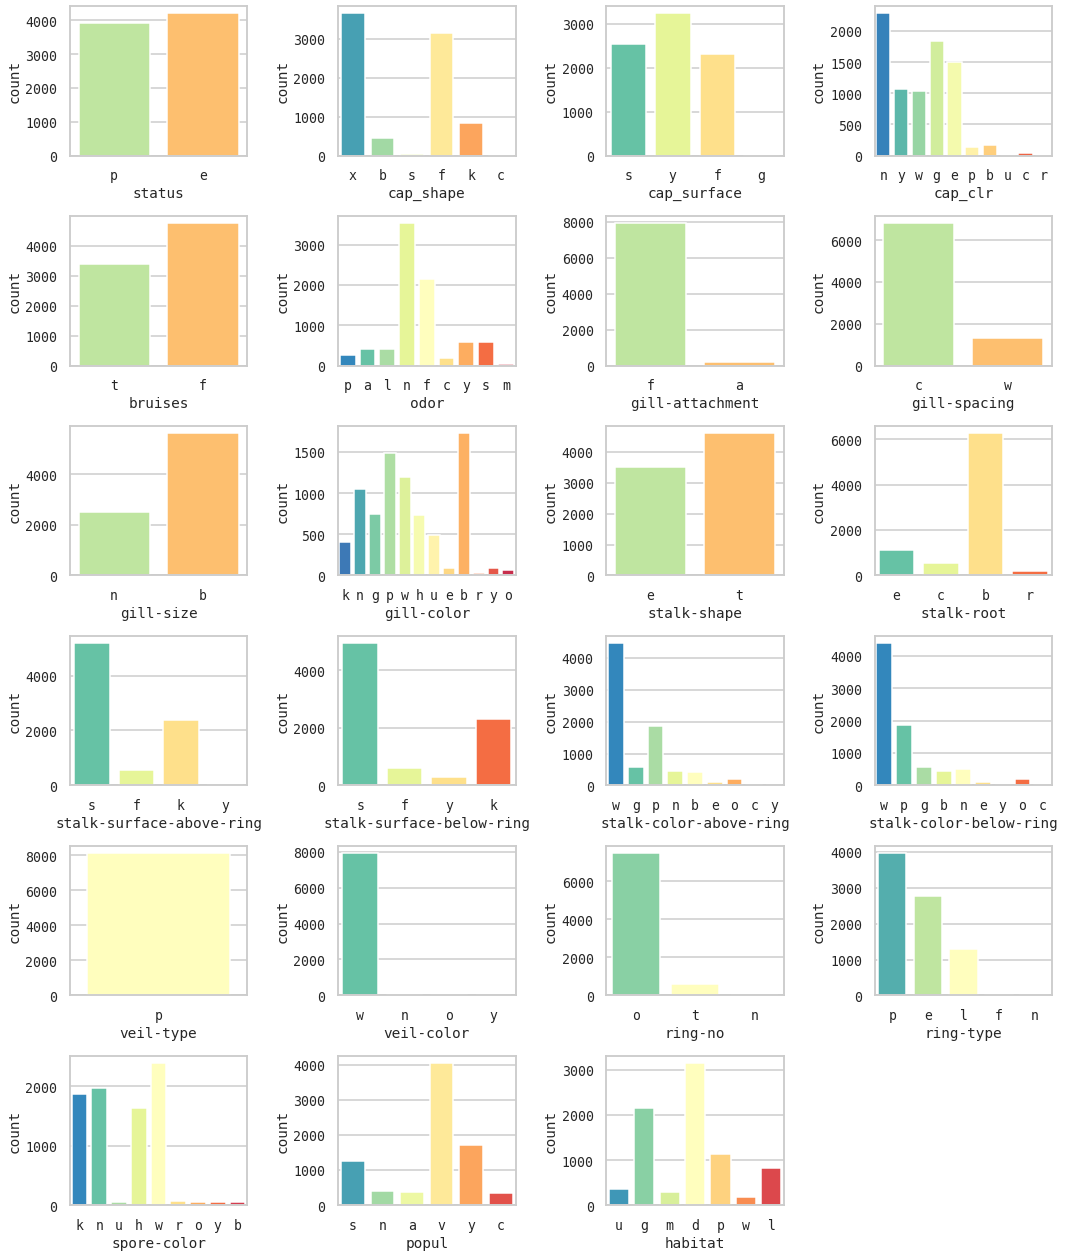

In [15]:
cl=ms.columns.values
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.figure(figsize=(15,20))
for i in range (0, 23):
    plt.subplot(7,4,i+1)
    sns.countplot(ms[cl[i]],saturation=9,palette='Spectral_r')

plt.tight_layout()
#count of all data given

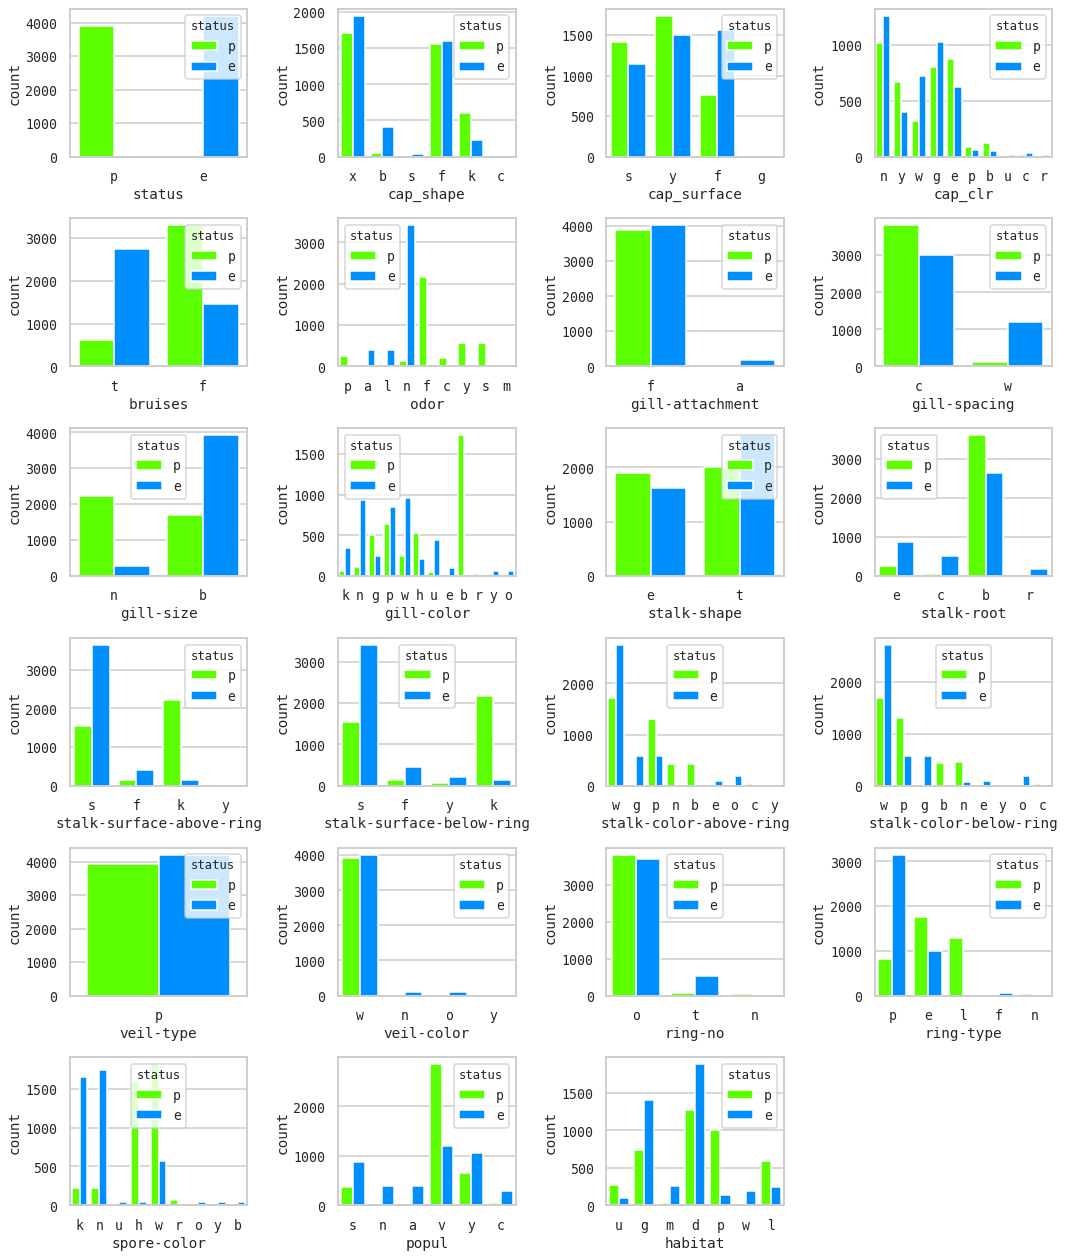

In [16]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.figure(figsize=(15,20))
for i in range (0, 23):
    plt.subplot(7,4,i+1)
    sns.countplot(ms[cl[i]],saturation=9,hue=ms[cl[0]],palette='gist_rainbow')

plt.tight_layout()
#count of all data by interms of edibility and poision

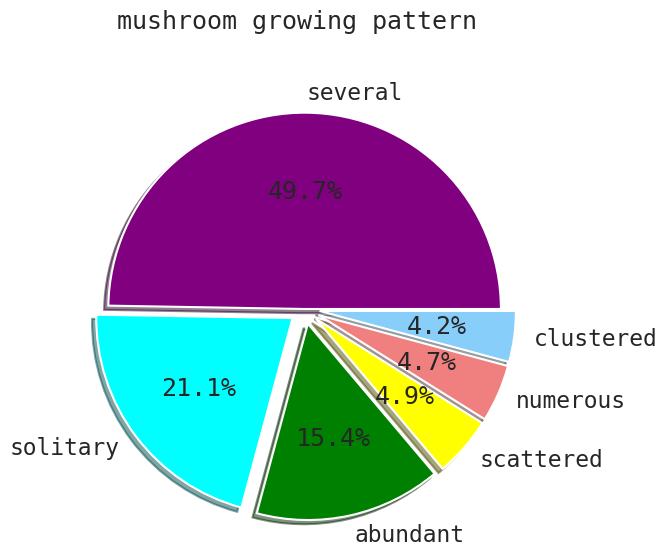

In [17]:
#population of mushroom pie chart
plt.figure(figsize=(5,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
ppl=ms['popul'].value_counts().values.tolist()
ppl_sprd='several','solitary','abundant','scattered','numerous','clustered' #spred in
clr = ['purple', 'cyan', 'green', 'yellow', 'lightcoral', 'lightskyblue']
e = (0, 0.1, 0.1, 0.1, 0.1, 0.1) #exploding parts
plt.pie(ppl, explode=e, labels=ppl_sprd, colors=clr, shadow=True,autopct='%1.1f%%',radius=1.3)
plt.title('mushroom growing pattern \n\n\n')
plt.show()

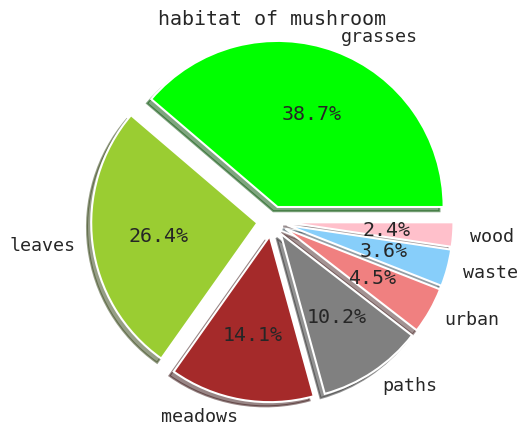

In [18]:
#habitat of mushroom
plt.figure(figsize=(5,5),dpi=100)
hbt='grasses','leaves','meadows','paths', 'urban','waste','wood'
presence=ms['habitat'].value_counts().values.tolist()
clr = ['lime', 'yellowgreen', 'brown', 'gray', 'lightcoral', 'lightskyblue','pink']
e = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(presence, explode=e, labels=hbt, colors=clr, shadow=True,autopct='%2.1f%%',radius=1.1)
plt.title('habitat of mushroom')
plt.show()

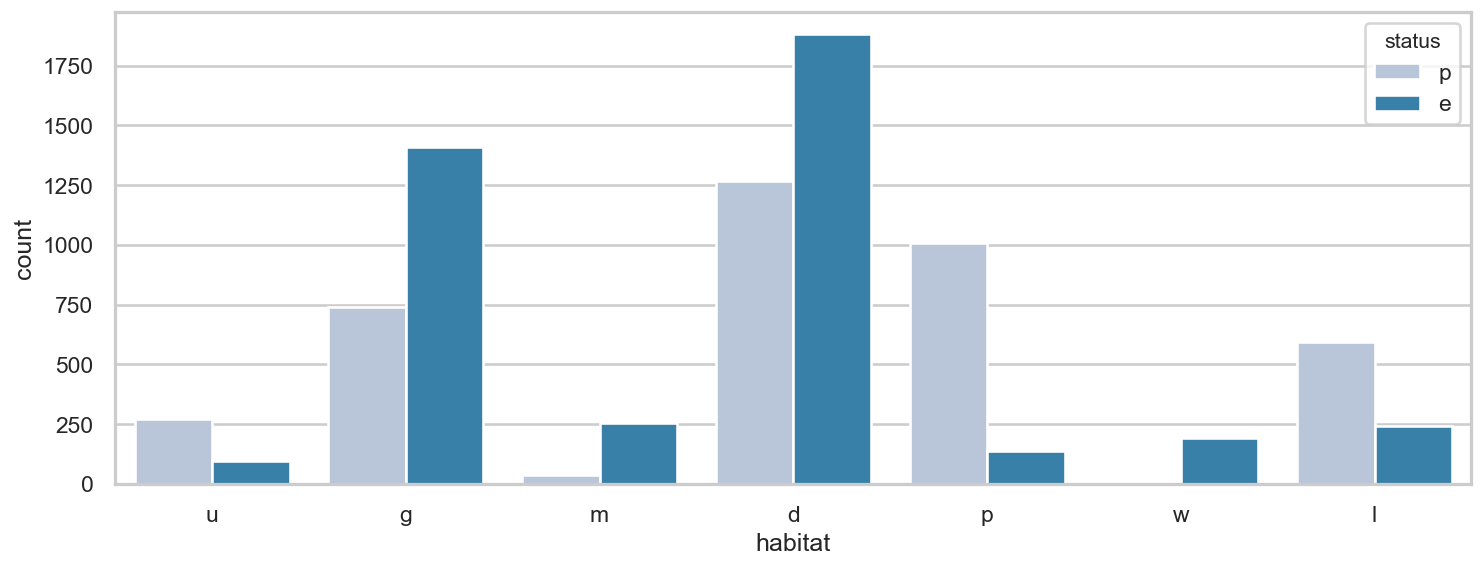

In [19]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.countplot(x='habitat',hue='status',data=ms,palette='PuBu')
plt.show()

In [20]:
for i in  ms.columns:
    ctab=pd.crosstab(ms[i],ms['status'])
    print('\n',ctab,'\n')
    #cross_checkig each value representing quality of mushrrom i.e. edible or poisionous 


 status     e     p
status            
e       4208     0
p          0  3916 


 status        e     p
cap_shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1708 


 status          e     p
cap_surface            
f            1560   760
g               0     4
s            1144  1412
y            1504  1740 


 status      e     p
cap_clr            
b          48   120
c          32    12
e         624   876
g        1032   808
n        1264  1020
p          56    88
r          16     0
u          16     0
w         720   320
y         400   672 


 status      e     p
bruises            
f        1456  3292
t        2752   624 


 status     e     p
odor              
a        400     0
c          0   192
f          0  2160
l        400     0
m          0    36
n       3408   120
p          0   256
s          0   576
y          0   576 


 status              e     p
gill-attachment      

In [21]:
status = {"e": 1, "p": 0}
ms['status']=ms['status'].map(status)
ms['status']
#renaming the edible with 1 and poisionous with 0

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: status, Length: 8124, dtype: int64

In [22]:
ms.tail(2)

,status,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
8122,0,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,1,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [23]:
x=ms.iloc[:,1:23]
y=ms.iloc[:,0]

In [24]:
#label encoding
for i in x.columns:
    if x[i].dtypes=='object':
        le=LabelEncoder()
        x[i]=le.fit_transform(x[i])

In [25]:
x.head(3)

,cap_shape,cap_surface,cap_clr,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-no,ring-type,spore-color,popul,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3


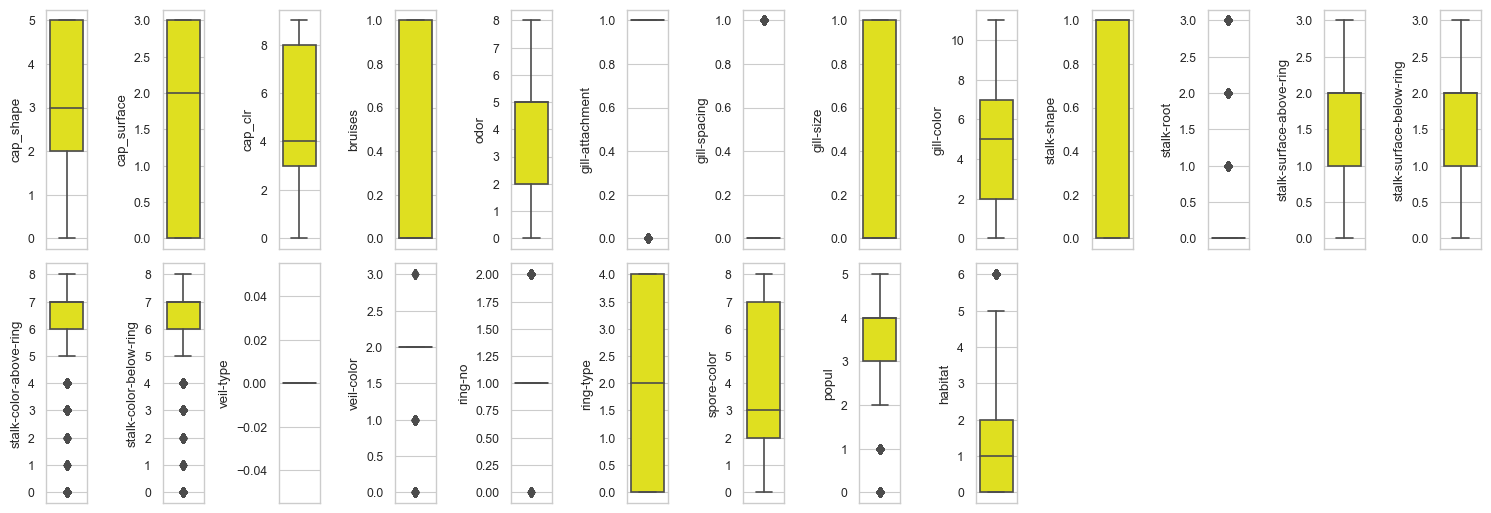

In [26]:
cl=x.columns.values
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.set_context("paper")
plt.figure(figsize=(15,23),dpi=100)
for i in range (0,22):
    plt.subplot(9,13,i+1)
    sns.boxplot(x[cl[i]], color='yellow',orient='v')
plt.tight_layout()

**removing outliers by zscore will drain the entire dataframe empty**

In [27]:
from sklearn.preprocessing import StandardScaler #FOR SCALING OF INPUTS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_auc_score,auc,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv


from sklearn.ensemble import GradientBoostingClassifier
import joblib #for saving the model

In [28]:
print('x:',"--"*30,"\n", x.head(7),'\nshape of x:', x.shape)
print('\ny:',"--"*30,"\n", y.head(7),'\nshape of y:', y.shape)

x: ------------------------------------------------------------ 
    cap_shape  cap_surface  cap_clr  bruises  odor  gill-attachment  \
0          5            2        4        1     6                1   
1          5            2        9        1     0                1   
2          0            2        8        1     3                1   
3          5            3        8        1     6                1   
4          5            2        3        0     5                1   
5          5            3        9        1     0                1   
6          0            2        8        1     0                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   
5            

In [29]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


In [30]:
y=np.array(y)
y=y.reshape(-1,1)
print('shape of x:', x.shape,'\nshape of y:', y.shape)

shape of x: (8124, 22) 
shape of y: (8124, 1)


In [31]:
def rst(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        auc_scores=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nF1 SCORE:', f1)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nAUC_ROC Score:\n',auc_scores)
    print('\nTPR:',tpr,'\nFPR:',fpr)

**Logisticregression**

In [32]:
logi=LogisticRegression()
rst(logi,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

The best suited random_score is:  54 

Accuracy score: 0.9750351617440225

F1 SCORE: 0.968291851346744

CONFUSION MATRIX:
 [[1331   41]
 [  52 1420]]

AUC_ROC Score:
 0.96739526555964

TPR: [0.         0.02988338 1.        ] 
FPR: [0.         0.96467391 1.        ]


In [33]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=50)
logi_roc_auc=cvs(logi,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
print('THE AUC_ROC SCORE AT LOGISTIC MODEL IS=', logi_roc_auc.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.9579383473453004
THE AUC_ROC SCORE AT LOGISTIC MODEL IS= 0.9865770826344169


**DecisionTreeClassifier**

In [34]:
dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10)}
dtc_gs=rsv(dtc,dtc_para,cv=20)
dtc_gs.fit(x,y)
print(dtc_gs)
print(dtc_gs.best_params_)


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [35]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=9,splitter='random')
rst(dtc,x,y)

In this DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random') 

The best suited random_score is:  25 

Accuracy score: 1.0

F1 SCORE: 1.0

CONFUSION MATRIX:
 [[1372    0]
 [   0 1472]]

AUC_ROC Score:
 1.0

TPR: [0. 0. 1.] 
FPR: [0. 1. 1.]


In [36]:
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=50)
dtc_roc_auc=cvs(dtc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
print('THE AUC_ROC SCORE AT DTC MODEL IS=',  dtc_roc_auc.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.9998773006134969
THE AUC_ROC SCORE AT DTC MODEL IS= 1.0


**SupportVectorclassifier**

In [37]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_grid=rsv(svc,svc_para,cv=20)
svc_grid.fit(x,y)
print(svc_grid)
print(svc_grid.best_params_)

RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
{'kernel': 'rbf', 'gamma': 0.1}


In [38]:
svc=SVC(kernel='rbf',C=1.0 ,degree=3 ,gamma=0.1)
rst(svc,x,y)

In this SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

The best suited random_score is:  25 

Accuracy score: 1.0

F1 SCORE: 1.0

CONFUSION MATRIX:
 [[1372    0]
 [   0 1472]]

AUC_ROC Score:
 1.0

TPR: [0. 0. 1.] 
FPR: [0. 1. 1.]


In [39]:
svc_accuracy=cvs(svc,x,y,scoring='accuracy',cv=50)
svc_roc_auc=cvs(svc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT SVC MODEL IS=', svc_accuracy.mean())
print('THE AUC_ROC SCORE AT SVC MODEL IS=',  svc_roc_auc.mean())

THE ACCURACY SCORE AT SVC MODEL IS= 1.0
THE AUC_ROC SCORE AT SVC MODEL IS= 1.0


**KneighborsClassifier**

In [40]:
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[10,30,35]}
knc_grd=rsv(knc,knc_para,cv=20)
knc_grd.fit(x,y)
print(knc_grd)
print(knc_grd.best_params_)

RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [10, 30, 35],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
{'n_neighbors': 21, 'leaf_size': 35, 'algorith

In [41]:
knc=KNeighborsClassifier(n_neighbors=21,algorithm='kd_tree',leaf_size=35)
rst(knc,x,y)

In this KNeighborsClassifier(algorithm='kd_tree', leaf_size=35, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform') 

The best suited random_score is:  25 

Accuracy score: 0.9989451476793249

F1 SCORE: 0.9929173693086004

CONFUSION MATRIX:
 [[1351   21]
 [   0 1472]]

AUC_ROC Score:
 0.9923469387755103

TPR: [0.         0.01530612 1.        ] 
FPR: [0. 1. 1.]


In [42]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=50)
knc_roc_auc=cvs(knc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
print('THE AUC_ROC SCORE AT KNC MODEL IS=',  knc_roc_auc.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.9982784215708551
THE AUC_ROC SCORE AT KNC MODEL IS= 1.0


In [43]:
gnb=GaussianNB()
rst(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 

The best suited random_score is:  94 

Accuracy score: 0.9156118143459916

F1 SCORE: 0.89256780556534

CONFUSION MATRIX:
 [[1272  100]
 [ 205 1267]]

AUC_ROC Score:
 0.8939236991380403

TPR: [0.        0.0728863 1.       ] 
FPR: [0.        0.8607337 1.       ]


In [44]:
gnb_accuracy=cvs(gnb,x,y,scoring='accuracy',cv=50)
gnb_roc_auc=cvs(gnb,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
print('THE AUC_ROC SCORE AT GNB MODEL IS=',  gnb_roc_auc.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.874636067560403
THE AUC_ROC SCORE AT GNB MODEL IS= 0.9389559146281037


**RandomForestClassifier**

In [45]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,300,350],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=70)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [46]:
rfc=RandomForestClassifier(n_estimators=350,max_depth=9,criterion='gini')
rst(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  25 

Accuracy score: 1.0

F1 SCORE: 1.0

CONFUSION MATRIX:
 [[1372    0]
 [   0 1472]]

AUC_ROC Score:
 1.0

TPR: [0. 0. 1.] 
FPR: [0. 1. 1.]


In [47]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=50)
rfc_roc_auc=cvs(rfc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
print('THE AUC_ROC SCORE AT RFC MODEL IS=',  rfc_roc_auc.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 1.0
THE AUC_ROC SCORE AT RFC MODEL IS= 1.0


**Basing on the above results it is clear that "Support Vector Classifier" model is giving the best performance so choosing it as final model.**

In [49]:
#auc_roc parameters obtained in SVC
tpr=[0.,0.,1.] 
fpr=[0., 1., 1.]

In [51]:
roc_auc= 1.0

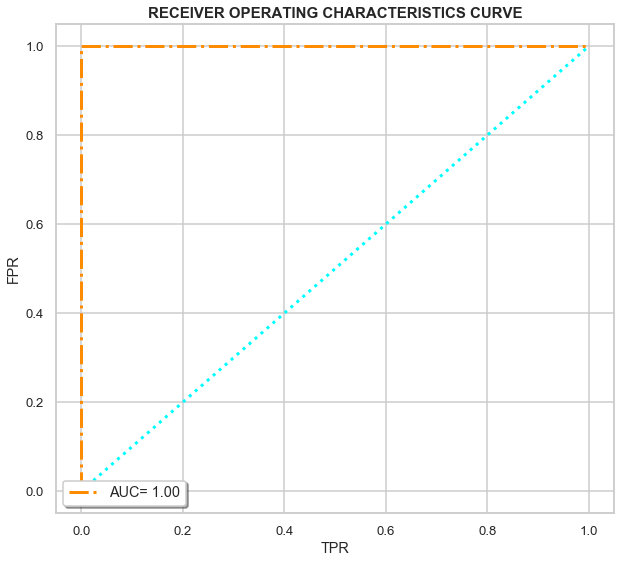

In [52]:
sns.set(style='whitegrid')
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
plt.figure(figsize=(10,9))
plt.plot([0,1],[0,1],color='cyan',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % roc_auc,color='darkorange',lw=3,linestyle='-.')
plt.legend(loc='lower left',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
plt.show()

In [54]:
joblib.dump(svc,"MUSHROOMS_sv.pkl")

['MUSHROOMS_sv.pkl']